# Statistics Formative Assessment

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### i) Exploratory data analysis and contact summaries

In [2]:
data = pd.read_excel('contacts_h1n1_data.xlsx') # read in data
data.head() # display the first 5 rows

,n,age,occupation_code,occupation_factor,sex,contacts
0,1,47,2,Teacher,0,11
1,2,25,2,Teacher,0,13
2,3,29,4,Homemaker,0,3
3,4,13,1,IT,0,7
4,5,29,3,Shop worker,1,7


In [3]:
print("Overall mean = ", str(round(data['contacts'].mean(), 2))) # average of contacts
print("Overall variance = ", str(round(data['contacts'].var(), 2))) # variance of contacts

occupations = sorted(set(data['occupation_factor'])) # alphabetical list of occupations

for occ in occupations:
    print(occ)
    print(round(data[data['occupation_factor']==occ]['contacts'].mean(), 2)) # mean for occupation
    print(round(data[data['occupation_factor']==occ]['contacts'].var(), 2)) # variance for occupation

Overall mean =  6.35
Overall variance =  18.69
Builder
5.43
5.83
Homemaker
2.71
2.68
IT
3.37
4.12
Shop worker
7.48
8.33
Teacher
12.7
13.26


In [9]:
print(data.isna().sum()) # NA and NULL values per column
print(data.isnull().sum())

n                    0
age                  0
occupation_code      0
occupation_factor    0
sex                  0
contacts             0
dtype: int64
n                    0
age                  0
occupation_code      0
occupation_factor    0
sex                  0
contacts             0
dtype: int64


### Occupation

<Figure size 7200x3600 with 0 Axes>

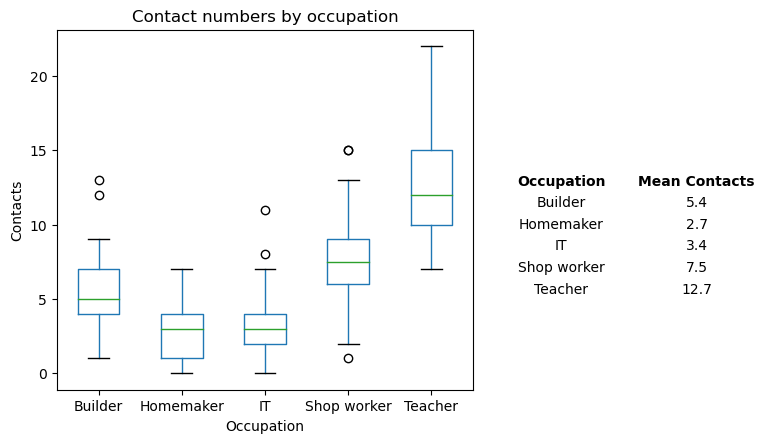

In [41]:
plt.figure(figsize=(12, 6), dpi=600) # set figure size and quality
boxplot = data.boxplot(column='contacts', by='occupation_factor', grid=False) # produce boxplot, without grid
plt.suptitle('') # remove default title
plt.xlabel('Occupation')
plt.ylabel('Contacts')
plt.title('Contact numbers by occupation')

mean_values = data.groupby('occupation_factor')['contacts'].mean().round(1) # calculate group averages

# create a table for occupation and mean contact numbers
table = plt.table(cellText=mean_values.reset_index().values,
                  colLabels=['Occupation', 'Mean Contacts'],
                  cellLoc='center', # positioning of text within columns
                  loc='right', 
                  bbox=[1.05, 0.25, 0.65, 0.36]) # control location and size of box

table.auto_set_font_size(False) # adjust text size
table.set_fontsize(10)
table.scale(0.6, 1.5)  # adjust scaling for better alignment with the plot

# remove cell lines
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)
    if key[0] == 0:
        cell.set_text_props(weight='bold') # set headers to bold

plt.subplots_adjust(right=0.75)  # adjust aspect ratio of figure

plt.savefig('summary_plot.png', bbox_inches='tight') # save figure without cutting off table

plt.show()

### Age

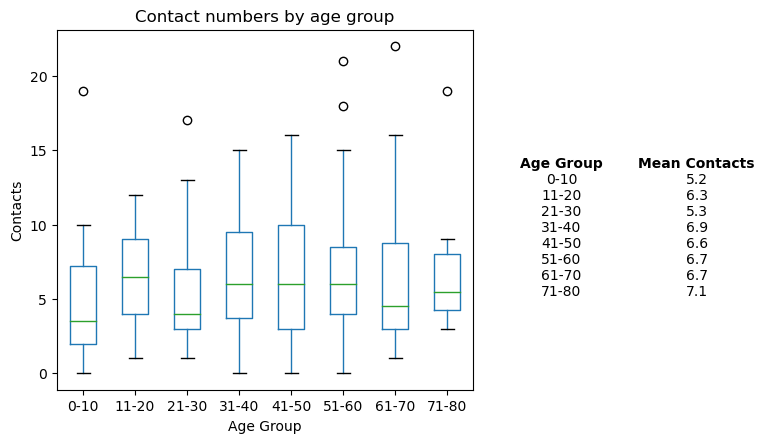

In [39]:
# create age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80] # stop at 80 as no one in the group is 80+
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# create a new dataframe column for age group
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# same as before but grouped by age rather than occupation
boxplot = data.boxplot(column='contacts', by='age_group', grid=False)
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('Contacts')
plt.title('Contact numbers by age group')

mean_values = data.groupby('age_group')['contacts'].mean().round(1)

table = plt.table(cellText=mean_values.reset_index().values,
                  colLabels=['Age Group', 'Mean Contacts'],
                  cellLoc='center',
                  loc='right',
                  bbox=[1.05, 0.25, 0.65, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.6, 1.5)

for key, cell in table.get_celld().items():
    cell.set_linewidth(0)
    if key[0] == 0:
        cell.set_text_props(weight='bold')

plt.subplots_adjust(right=0.75)

plt.show()

### Sex

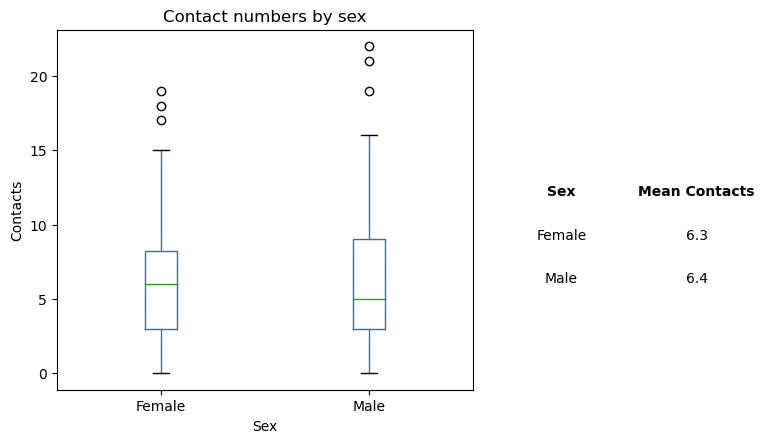

In [40]:
boxplot = data.boxplot(column='contacts', by='sex', grid=False)
plt.suptitle('')
plt.xlabel('Sex')
plt.ylabel('Contacts')
plt.title('Contact numbers by sex')

# convert x-axis labels to Female and Male instead of integers
plt.xticks([1, 2], ['Female', 'Male'])

# convert 0 to Female and 1 to Male for the table
data['sex'] = data['sex'].replace({0: 'Female', 1: 'Male'})

mean_values = data.groupby('sex')['contacts'].mean().round(1)

table = plt.table(cellText=mean_values.reset_index().values,
                  colLabels=['Sex', 'Mean Contacts'],
                  cellLoc='center',
                  loc='right',
                  bbox=[1.05, 0.25, 0.65, 0.36])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.6, 1.5)

for key, cell in table.get_celld().items():
    cell.set_linewidth(0)
    if key[0] == 0:
        cell.set_text_props(weight='bold')

plt.subplots_adjust(right=0.75)

plt.show()